1\. Write a function that converts number representation (bin<->dec<->hex)

In [38]:
def convertion(number, output_base):
    if type(a) == str:
        if number[1] == 'b':
            if output_base == 10:
                return int(number,2)
            elif output_base == 16:
                return hex(int(number,2))
        elif number[1] == 'x':
            if output_base == 10:
                return int(a,16)
            elif output_base == 2:
                return bin(int(number,16))
    elif type(number) == int:
        if output_base == 2:
            return bin(number)
        elif output_bases == 16:
            return hex(number)
        elif output_base == 10:
            return number
        else:
            print("Invalid output base")
    return None

2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [1]:
def spfp(number):
    if len(number)!=32:
        print("You don't have inserted a 32 bit word")
    #elif x for x in range(20) if x % 2 == 0:
        #print ("You don't have inserted a bit word")
    else:
        sign=int(number[0])
        exponent = 0
        for i in range(1,9):
            exponent = exponent + 2**(-i+8)*int(number[i])
        mantissa = 0
        for i in range(9,32):
            mantissa = mantissa + (2**(-i+8))*int(number[i])
        if sign==0:
            return (1+mantissa)*(2**(exponent-127))
        else:
            return (-1-mantissa)*(2**(exponent-127))
spfp("00000011111000000000000000000000")

1.316553672920962e-36

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [4]:
def downlimits():
    a = 1
    b = a/2
    i = 0
    while a!=b:
        temp = a
        a = b
        b = a/2
        i=i+1
    print(temp)
    print (i)
downlimits()

5e-324
1075


In [9]:
def uplimits():
    a = float(1)
    i=0
    while a<float('Inf'):
        temp = a
        a = a*2
        i=i+1
    print(temp)
    print(i)
uplimits()

8.98846567431158e+307
1024


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [10]:
a=float(1)
b=float(1)
i=0

while (a + b) > a:
    b=b/2
    i=i+1
    
print(b)
print(i)
print(a+b)

1.1102230246251565e-16
53
1.0


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [12]:
import numpy as np

def roots1():
    a,b,c = float(input("Insert a ")),float(input("Insert b ")),float(input("Insert c "))
    x1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
    x2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
    return x1,x2


roots1()

Insert a 0.001
Insert b 1000
Insert c 0.001


(-9.999894245993346e-07, -999999.999999)

In [15]:
def roots2():
    a,b,c = float(input("Insert a ")),float(input("Insert b ")),float(input("Insert c "))
    x1 = (4*a*c)/(2*a*(-b+np.sqrt(b**2-4*a*c)))
    x2 = (4*a*c)/(2*a*(-b-np.sqrt(b**2-4*a*c)))
    return x1,x2

roots2()

Insert a 0.001
Insert b 1000
Insert c 0.001


(-1000010.5755125057, -1.0000000000009999e-06)

In [18]:
def roots3():
    a,b,c = float(input("Insert a ")),float(input("Insert b ")),float(input("Insert c "))
    x1 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
    x2 = (4*a*c)/(2*a*(-b-np.sqrt(b**2-4*a*c)))
    return x1,x2
roots3()

Insert a 0.001
Insert b 1000
Insert c 0.001


(-999999.999999, -1.0000000000009999e-06)

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

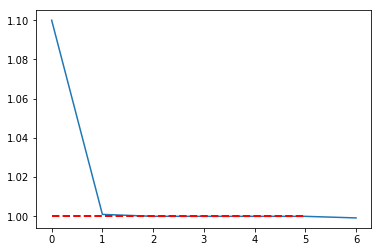

In [25]:
from matplotlib import pyplot as plt

def derivative2(x):
    return x-1+x

def function(x):
    return x*(x-1)

def derivative(fun,delta):
    return ((function(1+delta)-fun)/delta)

Delta = [10e-2,10e-4,10e-6,10e-8,10e-10,10e-12,10e-14]

results=[]

for delta in Delta:
    results.append(derivative(function(1),delta))
    
plt.plot(results)
plt.plot([0,5],[derivative2(1),derivative2(1)],'r--',lw=2)
#when delta is not so small, the approximation is not very good. Decreasing delta it becomes better but 
#the best value of delta is not the smallest one because at a certain point the difference with
#the true value restart to increase

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [26]:
def integral(N):
    h = 2/N
    integral = 0
    for i in range(N):
        mean = abs(np.sqrt(1-(-1+i*h)**2)+np.sqrt(1-(-1+i*h+h)**2))/2
        integral = integral + h*mean
    return integral
    

In [27]:
x = np.zeros(98)
for i in range(2,100):
    x[i-2]=integral(i)

/home/federico/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


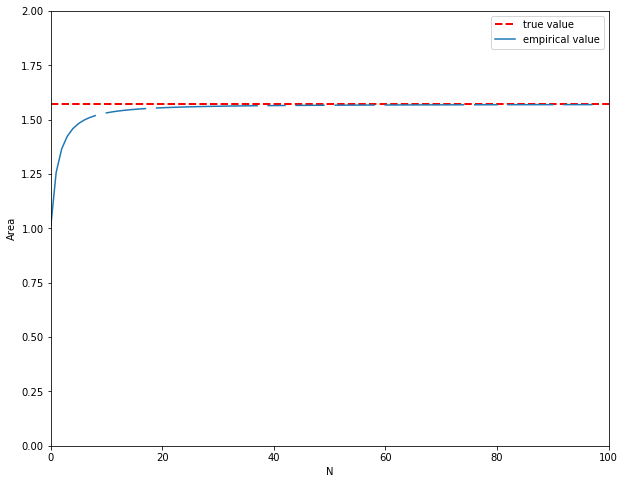

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.axis([0, 100, 0, 2])
plt.plot([0,100],[1.57,1.57],'r--',lw=2, label='true value')
plt.plot(x,label='empirical value')
plt.xlabel('N')
plt.ylabel('Area')
plt.legend()

In [35]:
%timeit integral(100)
%timeit integral(1000)
%timeit integral(10000)
%timeit integral(100000)
%timeit integral(1000000)
%timeit integral(10000000)

264 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.61 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.2 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
249 ms ± 5.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.5 s ± 50.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
24.5 s ± 44.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
print(integral(100))
print(integral(1000))
print(integral(10000))
print(integral(100000))
print(integral(1000000))
print(integral(10000000))

1.5691342555492493
1.57074373850107
1.570794663715288
1.5707962742033925
1.570796325131829
1.5707963267420648
